In [49]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the data
file_path = 'Hackathon_Fall_2023.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
print("Initial Data:\n", data.head())



Initial Data:
    userid usergender              userdob           ads  Unnamed: 4  \
0       3          w  1996-04-18 00:00:00       friends         NaN   
1       4          w  2004-07-03 00:00:00     instagram         NaN   
2       5          w  1999-11-03 00:00:00  searchengine         NaN   
3       6          w  2005-12-02 00:00:00       friends         NaN   
4       7          w  2002-06-18 00:00:00     instagram         NaN   

   Ads: How do you know about Arc Dance Studio  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  


C:\Users\Acer\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
# Step 2: Data Cleaning and Preparation
data_cleaned = data.drop(columns=['Unnamed: 4', 'Ads: How do you know about Arc Dance Studio'])
data_cleaned['userdob'] = pd.to_datetime(data_cleaned['userdob'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['userdob', 'ads'])
current_year = datetime.now().year
data_cleaned['age'] = current_year - data_cleaned['userdob'].dt.year
data_cleaned = data_cleaned.drop(columns=['userdob'])
data_prepared = pd.get_dummies(data_cleaned, columns=['usergender', 'ads'])
print("Cleaned and Prepared Data:\n", data_prepared.head())

Cleaned and Prepared Data:
    userid  age  usergender_m  usergender_w  ads_friends  ads_instagram  \
0       3   27             0             1            1              0   
1       4   19             0             1            0              1   
2       5   24             0             1            0              0   
3       6   18             0             1            1              0   
4       7   21             0             1            0              1   

   ads_others  ads_searchengine  ads_tiktok  ads_youtube  
0           0                 0           0            0  
1           0                 0           0            0  
2           0                 1           0            0  
3           0                 0           0            0  
4           0                 0           0            0  


In [4]:
# Step 3: Defining user segments
def define_segment(age):
    if 18 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 40:
        return 'Adult'
    else:
        return 'Older Adult'

data_prepared['segment'] = data_prepared['age'].apply(define_segment)
print("Data with Segments:\n", data_prepared.head())

Data with Segments:
    userid  age  usergender_m  usergender_w  ads_friends  ads_instagram  \
0       3   27             0             1            1              0   
1       4   19             0             1            0              1   
2       5   24             0             1            0              0   
3       6   18             0             1            1              0   
4       7   21             0             1            0              1   

   ads_others  ads_searchengine  ads_tiktok  ads_youtube      segment  
0           0                 0           0            0        Adult  
1           0                 0           0            0  Young Adult  
2           0                 1           0            0  Young Adult  
3           0                 0           0            0  Young Adult  
4           0                 0           0            0  Young Adult  


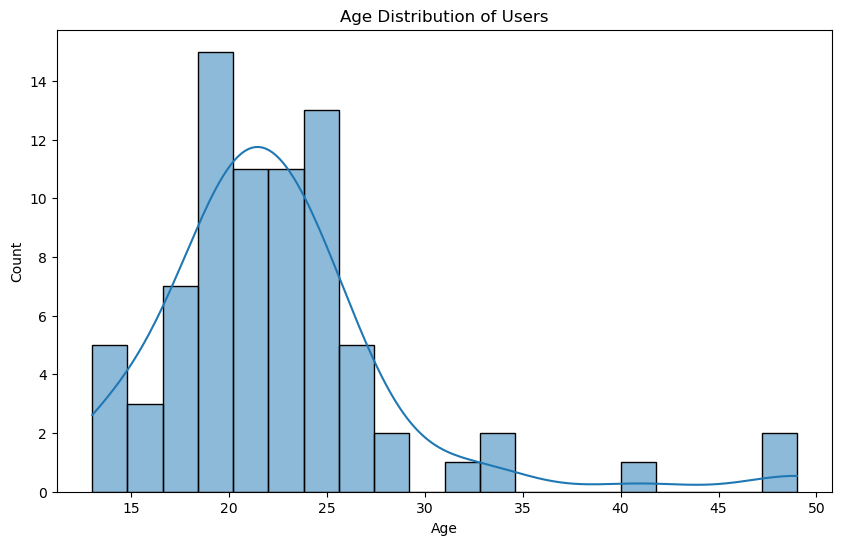

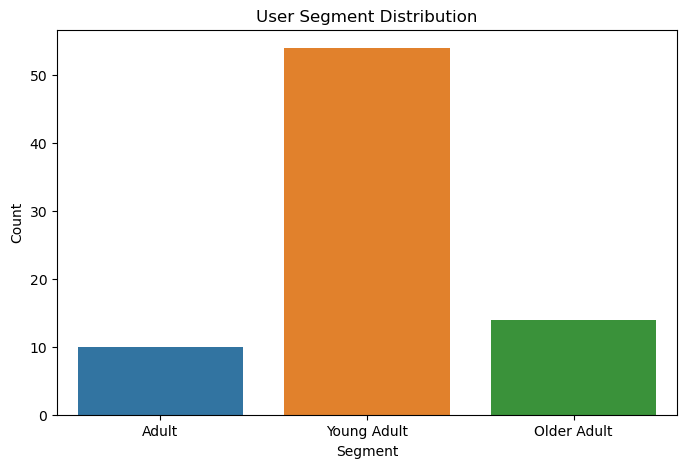

In [36]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_prepared['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Segments
plt.figure(figsize=(8, 5))
sns.countplot(data=data_prepared, x='segment')
plt.title('User Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


In [5]:
# Step 4: Splitting the data into features and target variable
X = data_prepared.drop(columns=['userid', 'segment'])
y = data_prepared['segment']

In [6]:
# Step 5: Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Size:", X_train.shape[0])
print("Test Set Size:", X_test.shape[0])

Training Set Size: 62
Test Set Size: 16


In [7]:
# Step 6: Training the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print("KNN Model Trained.")

KNN Model Trained.


In [8]:
# Step 7: Making predictions and evaluating the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)


In [9]:
# Step 8: Output the results
print("Accuracy of the model:", accuracy)
print("Classification Report:\n", classification_report_output)


Accuracy of the model: 1.0
Classification Report:
               precision    recall  f1-score   support

       Adult       1.00      1.00      1.00         3
 Older Adult       1.00      1.00      1.00         2
 Young Adult       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [50]:
import pandas as pd
import pygwalker as pyg

ImportError: cannot import name 'deprecated' from 'typing_extensions' (C:\Users\Acer\anaconda3\lib\site-packages\typing_extensions.py)

In [46]:
pip install pygwalker==0.3.2

Note: you may need to restart the kernel to use updated packages.


# Shopping Cart Data

Step-by-Step Explanation and Corresponding Code:
Import Libraries and Load Data:

We start by importing necessary libraries: pandas for data manipulation, matplotlib and seaborn for visualization.
The data from the "Shopping Cart data" sheet in the provided Excel file is loaded into a pandas DataFrame.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Hackathon_Fall_2023.xlsx'  # Replace with your file path
shopping_cart_data = pd.read_excel(file_path, sheet_name='Shopping Cart data')


Data Cleaning:

Remove irrelevant columns that either have missing data or are not useful for the analysis.
Drop rows with any missing values to clean the dataset.

In [11]:
columns_to_drop = ['Unnamed: 6', 'shoppingcartitemstudentid.1', 'Random data for guest or registered number for user']
shopping_cart_data_cleaned = shopping_cart_data.drop(columns=columns_to_drop)
shopping_cart_data_cleaned = shopping_cart_data_cleaned.dropna()


Descriptive Statistics:

Obtain basic statistics for the dataset using the describe() method, which provides insights like count, mean, standard deviation, etc.

In [12]:
desc_stats = shopping_cart_data_cleaned.describe()


Most Popular Classes Analysis:

Determine the most frequently added classes to shopping carts by counting the occurrences of each class ID.

In [13]:
popular_classes = shopping_cart_data_cleaned['shoppingcartitemclassid'].value_counts().head(10)


Shopping Cart Activity Analysis Over Time:

Extract date and time components from the timestamp to analyze shopping activity patterns.
Aggregate data by date and hour to find peak shopping times.

In [14]:
shopping_cart_data_cleaned['add_date'] = shopping_cart_data_cleaned['shoppingcartaddtime'].dt.date
shopping_cart_data_cleaned['add_hour'] = shopping_cart_data_cleaned['shoppingcartaddtime'].dt.hour
activity_by_date = shopping_cart_data_cleaned['add_date'].value_counts()
activity_by_hour = shopping_cart_data_cleaned['add_hour'].value_counts().sort_index()


Average Quantity Calculation:

Calculate the average quantity of items added to shopping carts.

In [15]:
average_quantity = shopping_cart_data_cleaned['shoppingcartitemquantity'].mean()


Visualization of Shopping Cart Activity by Hour:

Create a bar plot to visualize the number of items added to shopping carts across different hours of the day.

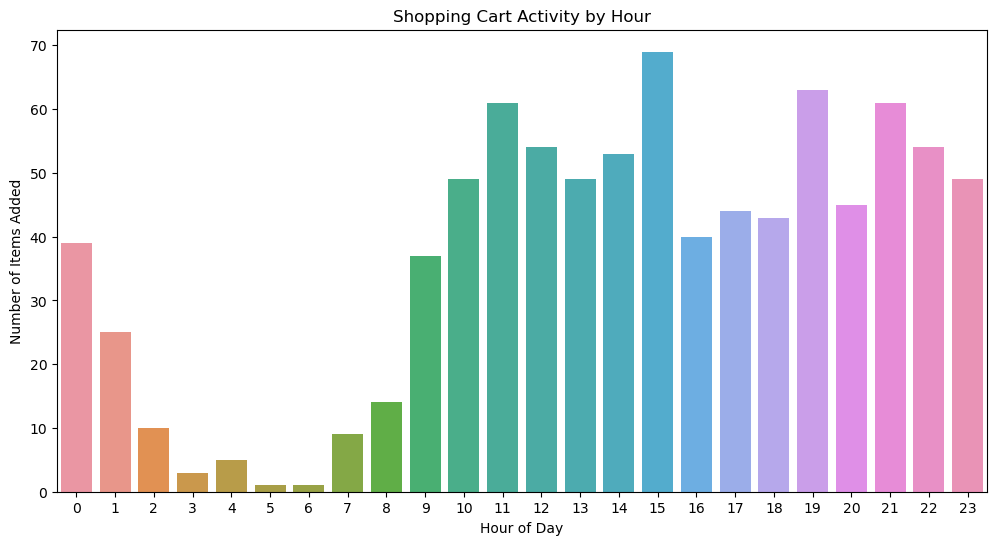

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_by_hour.index, y=activity_by_hour.values)
plt.title('Shopping Cart Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Items Added')
plt.xticks(range(0, 24))
plt.show()


Display Results:

Print out the results from the analysis.

In [17]:
print("Descriptive Statistics:\n", desc_stats)
print("\nMost Popular Classes:\n", popular_classes)
print("\nActivity by Date:\n", activity_by_date)
print("\nAverage Quantity per Shopping Cart:", average_quantity)


Descriptive Statistics:
        shoppingcartitemid  shoppingcartitemstudentid  shoppingcartitemclassid  \
count          878.000000               8.780000e+02               878.000000   
mean           458.882688               5.095138e+08                91.683371   
std            263.553930               2.881690e+08                23.926102   
min              1.000000               3.000000e+00                42.000000   
25%            232.250000               2.695812e+08                71.000000   
50%            460.500000               5.174635e+08                93.000000   
75%            685.750000               7.606209e+08               111.000000   
max            917.000000               9.949946e+08               142.000000   

       shoppingcartitemquantity  
count                878.000000  
mean                   1.378132  
std                    9.756000  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%    

In [37]:
# Example of plotting a distribution of a numeric variable
plt.figure(figsize=(10, 6))
sns.histplot(shopping_cart_data['your_numeric_column'], bins=20)
plt.title('Distribution of Your Numeric Column')
plt.xlabel('Your Numeric Column')
plt.ylabel('Frequency')
plt.show()

# Example of a categorical count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='your_categorical_column', data=shopping_cart_data)
plt.title('Count of Categories in Your Categorical Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


KeyError: 'your_numeric_column'

<Figure size 1000x600 with 0 Axes>

 Based on these column names, let's tailor the visualization code. Assuming you might be interested in the distribution of quantities (shoppingcartitemquantity) and the time items were added to the cart (shoppingcartaddtime), here are the updated code snippets for visualization:

#Step 1: Visualizing the Distribution of Quantities

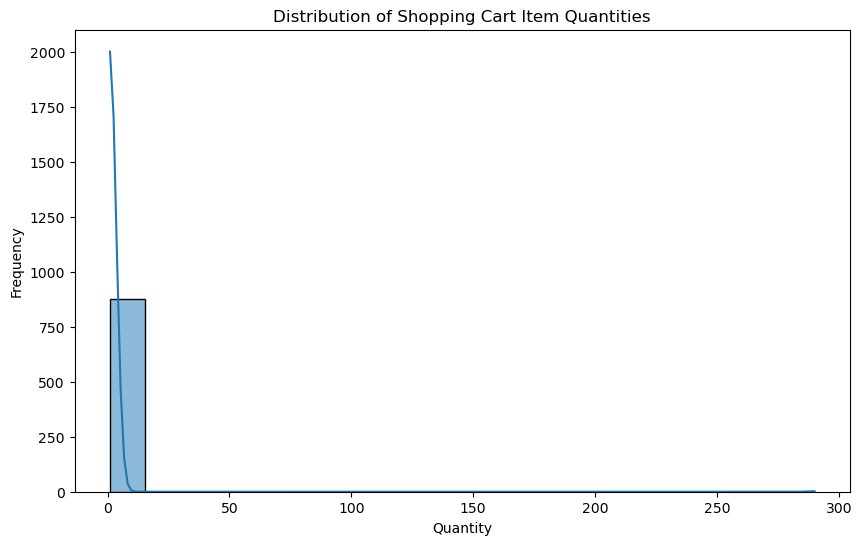

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of shopping cart item quantities
plt.figure(figsize=(10, 6))
sns.histplot(shopping_cart_data['shoppingcartitemquantity'], bins=20, kde=True)
plt.title('Distribution of Shopping Cart Item Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


Step 2: Visualizing the Time Items Were Added to the Cart
Since shoppingcartaddtime is likely a datetime column, you might want to plot it as a time series. However, this requires parsing the datetime correctly. Here's an example assuming the column is already in a suitable datetime format:

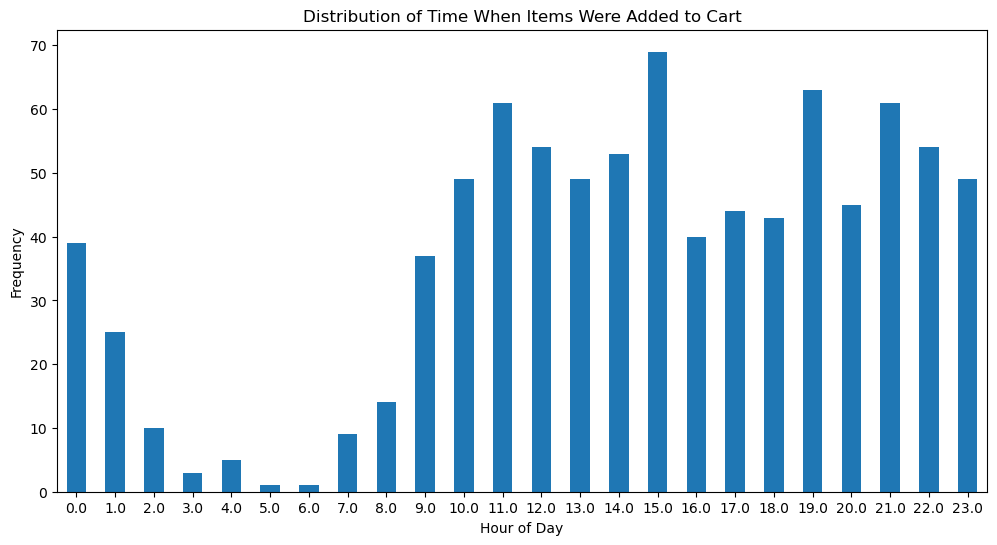

In [39]:
# Converting 'shoppingcartaddtime' to datetime format
shopping_cart_data['shoppingcartaddtime'] = pd.to_datetime(shopping_cart_data['shoppingcartaddtime'])

# Plotting the time items were added to the cart
plt.figure(figsize=(12, 6))
shopping_cart_data['shoppingcartaddtime'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Time When Items Were Added to Cart')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Class Data Sheet

Step-by-Step Explanation and Corresponding Code:
Import Libraries and Load Data:

Import necessary libraries: pandas for data manipulation, matplotlib and seaborn for visualization.
Load the data from the "Class Data Sheet" in the provided Excel file into a pandas DataFrame.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Hackathon_Fall_2023.xlsx'  # Replace with your file path
class_data = pd.read_excel(file_path, sheet_name='Class Data')


Data Cleaning:

Remove irrelevant columns that are either unnamed or contain missing/irrelevant data.
Drop rows with any missing values to ensure a clean dataset.

In [21]:
columns_to_drop = ['Unnamed: 9', 'See https://arcscheduler.com/calendar.php for more detail', 'Unnamed: 11', 'Unnamed: 12']
class_data_cleaned = class_data.drop(columns=columns_to_drop)
class_data_cleaned = class_data_cleaned.dropna()


Descriptive Statistics:

Obtain basic statistics for the dataset using the describe() method. This provides insights like count, mean, standard deviation, etc., for numerical columns.

In [22]:
desc_stats = class_data_cleaned.describe()


Class Popularity Analysis:

Determine the most popular classes based on total students. This is done by grouping the data by class names and summing the total students for each class.

In [23]:
popular_classes = class_data_cleaned.groupby('classname')['classtotalstudent'].sum().sort_values(ascending=False).head(10)


Teacher Analysis:

Analyze which teachers are associated with the most classes by counting the occurrences of each teacher's name.

In [24]:
teacher_classes = class_data_cleaned['classteacher'].value_counts()


Class Availability and Types Analysis:

Analyze class availability by counting the occurrences of each value in the classavailable column.
Analyze class types (tags) by counting the occurrences of each tag in the classtag column.

In [25]:
class_availability = class_data_cleaned['classavailable'].value_counts()
class_types = class_data_cleaned['classtag'].value_counts()


Visualization (Optional):

If needed, create visualizations to better understand the distribution of class types or teacher distribution.
For example, a bar plot for class types.

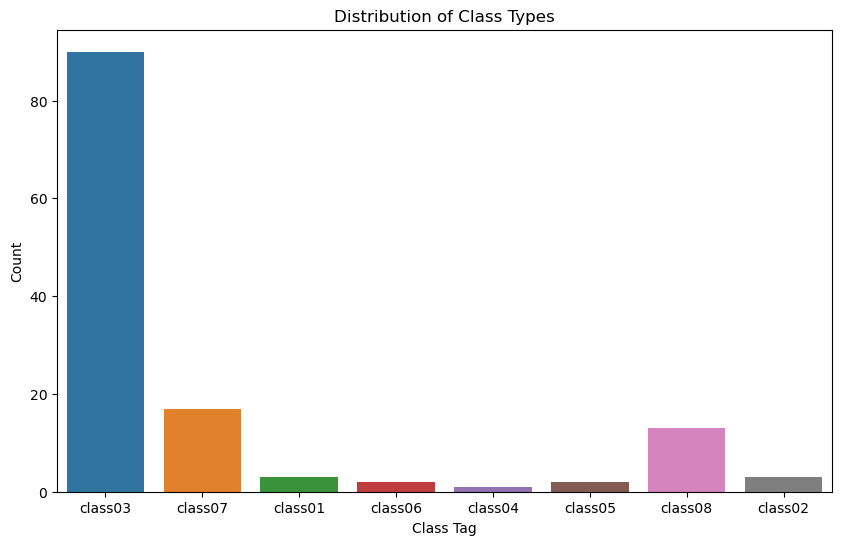

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='classtag', data=class_data_cleaned)
plt.title('Distribution of Class Types')
plt.xlabel('Class Tag')
plt.ylabel('Count')
plt.show()


Display Results:

Print out the results from the analysis.

In [27]:
print("Descriptive Statistics:\n", desc_stats)
print("\nMost Popular Classes:\n", popular_classes)
print("\nTeacher Class Counts:\n", teacher_classes)
print("\nClass Availability:\n", class_availability)
print("\nClass Types:\n", class_types)


Descriptive Statistics:
           classid  classtotalstudent
count  131.000000         131.000000
mean    74.786260          28.625954
std     43.800598           3.619043
min      1.000000          15.000000
25%     34.500000          30.000000
50%     78.000000          30.000000
75%    113.000000          30.000000
max    146.000000          30.000000

Most Popular Classes:
 classname
K-FIT                             280.0
JOONG CHOREOGRAPHY                180.0
TERRI: COMMERCIAL CHOREOGRAPHY    120.0
JOONG: CHOREOGRAPHY                90.0
NCT 127 | LIMITLESS                60.0
SEVENTEEN | GOD OF MUSIC           50.0
SEVENTEEN | FIRE                   30.0
SEVENTEEN | FALLIN FLOWER          30.0
SEVENTEEN | DON’T WANNA CRY        30.0
SEVENTEEN | CRUSH                  30.0
Name: classtotalstudent, dtype: float64

Teacher Class Counts:
 Terri       41
Joong       30
Yana        21
Susan       15
Jeremy      13
Sua          4
Katy         3
LEE JUNG     1
JOONG        1
SUA      

Example Visualization: Number of Students per Class

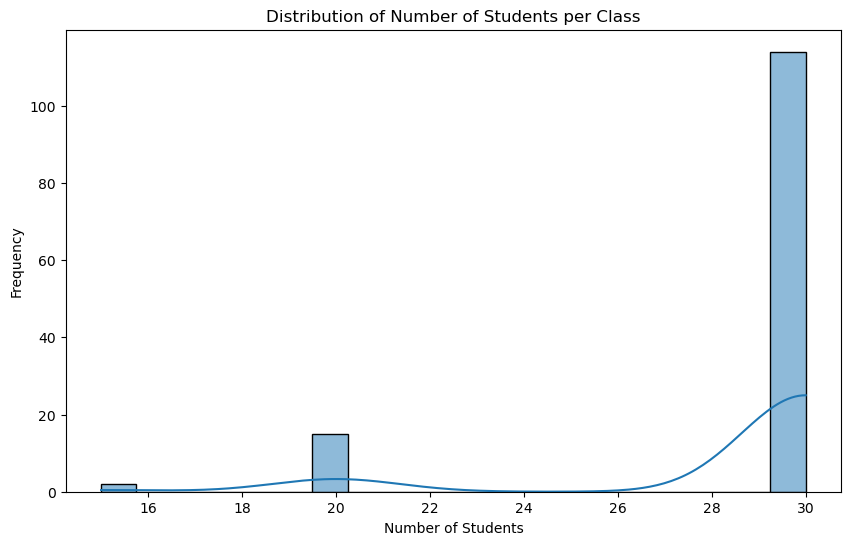

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(class_data['classtotalstudent'], bins=20, kde=True)
plt.title('Distribution of Number of Students per Class')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.show()


Example Visualization: Class Types (if you have such a column)

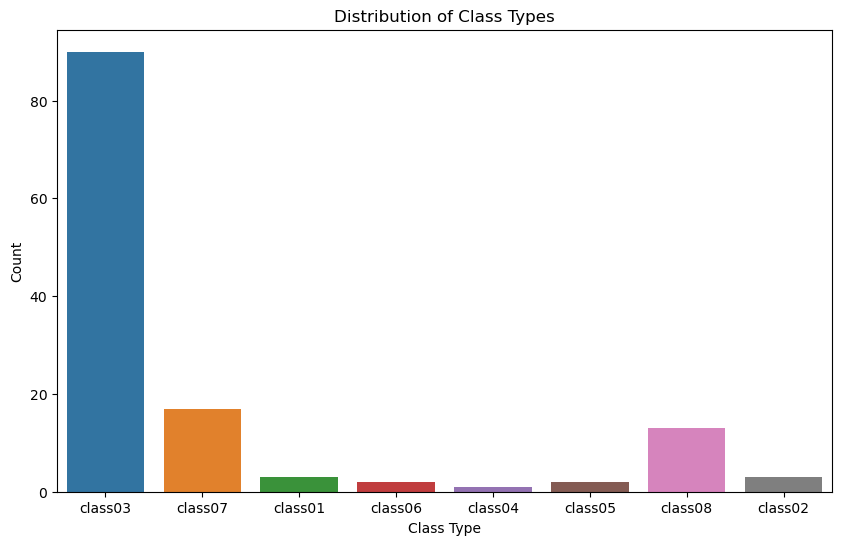

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='classtag', data=class_data)
plt.title('Distribution of Class Types')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()


# Salesorder Data

Step-by-Step Explanation and Corresponding Code:
Import Libraries and Load Data:

Import necessary libraries: pandas for data manipulation, matplotlib for visualization.
Load the data from the "Salesorder Data Sheet" in the provided Excel file into a pandas DataFrame.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Hackathon_Fall_2023.xlsx'  # Replace with your file path
salesorder_data = pd.read_excel(file_path, sheet_name='Salesorder Data')


Data Cleaning:

Remove irrelevant columns that are either unnamed or contain missing/irrelevant data.
Drop rows with any missing values to ensure a clean dataset.

In [29]:
columns_to_drop = ['Unnamed: 7', 'salesorderstudentid.1', 'Random data for guest or registered number for user', 'Unnamed: 10']
salesorder_data_cleaned = salesorder_data.drop(columns=columns_to_drop)
salesorder_data_cleaned = salesorder_data_cleaned.dropna()


Descriptive Statistics:

Obtain basic statistics for the dataset using the describe() method. This provides insights like count, mean, standard deviation, etc., for numerical columns.

In [30]:
desc_stats_sales = salesorder_data_cleaned.describe()


Sales Order Status Analysis:

Analyze the distribution of credit card approval statuses to understand the success rate of transactions.

In [31]:
approval_status_distribution = salesorder_data_cleaned['creditcardapprovalstatus'].value_counts()


Total Sales Analysis:

Sum up the total amount paid across all sales orders to gauge overall sales.


In [32]:
total_sales = salesorder_data_cleaned['totalamountpaid'].sum()


Order Date Analysis:

Analyze the frequency of orders by date to identify any trends or peak sales days.

In [33]:
order_date_distribution = salesorder_data_cleaned['orderdate'].dt.date.value_counts()


Visualization of Order Date Distribution:

Create a bar plot to visualize the number of orders on different dates.

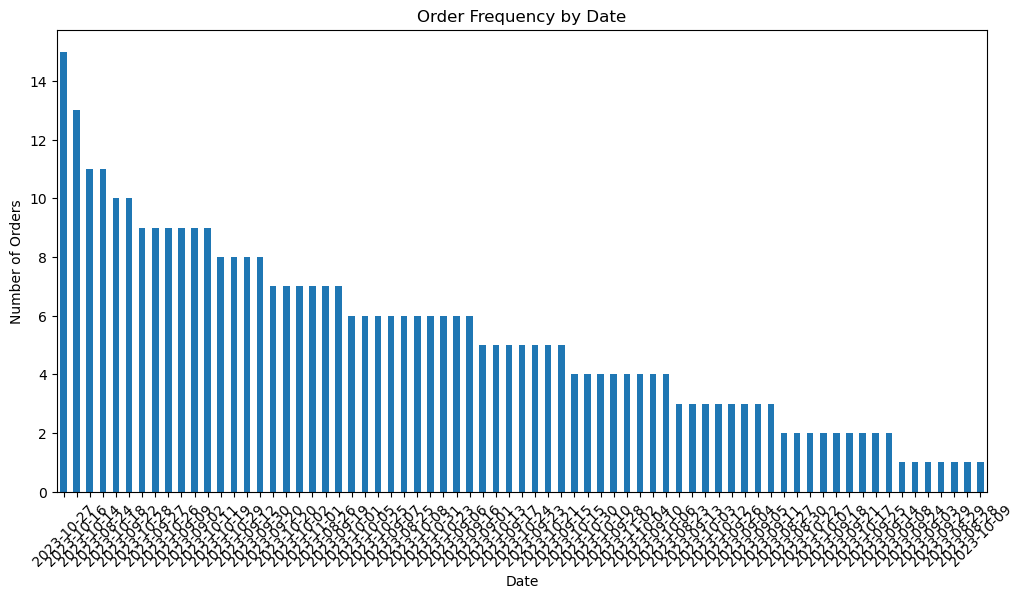

In [34]:
plt.figure(figsize=(12, 6))
order_date_distribution.plot(kind='bar')
plt.title('Order Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Display Results:

Print out the results from the analysis.

In [35]:
print("Descriptive Statistics:\n", desc_stats_sales)
print("\nApproval Status Distribution:\n", approval_status_distribution)
print("\nTotal Sales Amount:", total_sales)
print("\nOrder Frequency by Date:\n", order_date_distribution.head())


Descriptive Statistics:
        salesorderid  salesorderstudentid  totalamountpaid
count    374.000000         3.740000e+02       374.000000
mean     216.221925         4.195239e+08        16.628342
std      122.934654         3.223920e+08         7.425653
min        1.000000         3.000000e+00         0.000000
25%      113.250000         1.261717e+08        16.000000
50%      215.500000         3.960250e+08        16.000000
75%      324.750000         7.179585e+08        16.000000
max      425.000000         9.949946e+08        72.000000

Approval Status Distribution:
 Succeeded    374
Name: creditcardapprovalstatus, dtype: int64

Total Sales Amount: 6219

Order Frequency by Date:
 2023-10-27    15
2023-10-16    13
2023-10-14    11
2023-08-24    11
2023-10-18    10
Name: orderdate, dtype: int64
